In [92]:
import pandas as pd
import numpy as np

In [93]:
#read in the CSV file
df_19 = pd.read_csv('./data/salaries_2019.csv')

In [94]:
def preprocess_data(df):
    #remove whitespace in column headers
    df.columns = [col.strip() for col in df.columns]

    #convert the first three columns from type 'object' to 'string'
    df[df.columns[0:3]] = df[df.columns[0:3]].astype(str)
 
    #clean the remaining columns and convert from type 'object' to 'float', except for the last (POSTAL)
    df[df.columns[3:-1]] = df[df.columns[3:-1]].applymap(lambda x: x.strip()) \
    .replace({'^-$':0, ',':'', '\(':'', '\)':''}, regex=True).astype(float)
    
preprocess_data(df_19)

#confirm the types are changed by printing the data types
print(df_19.dtypes)

NAME                          object
DEPARTMENT_NAME               object
TITLE                         object
REGULAR                      float64
RETRO                        float64
OTHER                        float64
OVERTIME                     float64
INJURED                      float64
DETAIL                       float64
QUINN/EDUCATION INCENTIVE    float64
TOTAL EARNINGS               float64
POSTAL                         int64
dtype: object


In [96]:
#print all the possible departments
print(df_19['DEPARTMENT_NAME'].unique())

['BPS Business Service' 'Workers Compensation Service'
 'Boston Police Department' 'Boston Fire Department'
 'Inspectional Services Dept' 'BPS Facility Management'
 'Auditing Department' 'Chief of Staff' 'Boston Public Library'
 'Dpt of Innovation & Technology' "Mayor's Office"
 'Public Works Department' 'BPS Human Resource Team'
 'Treasury-Treasury Division' 'Traffic Division'
 'Public Facilities Department' 'Property Management'
 'Kennedy, EM Health Academy' 'BPS High School Renewal'
 'Chief Operating Officer' 'Achievement Gap' 'Fam & Student Engagemt'
 'School Support & Tranformation' 'BPS Boston Latin'
 'Advancement & Ext. Affairs' 'Jackson/Mann K-8' 'Tech Boston Academy'
 'Parks Department' 'BPS Special Education' 'Unified Student Svc'
 "BPS O'Bryant School" 'BPS Charlestown High' 'BPS East Boston High'
 'Strategy Department' 'Election Division' 'Law Department'
 'Neighborhood Development' 'Teaching & Learning' 'BPS Madison Park High'
 'BPS Equity' 'Boston Retirement System' 'Chie

In [98]:
#create subsets of the dataframe for BPS, BPD, and BFD
def subset_data(df):
    school_df = (df.loc[df['DEPARTMENT_NAME'].str.contains('^BPS', regex=True)])
    police_df = df.loc[df['DEPARTMENT_NAME'] == 'Boston Police Department']
    fire_df = df.loc[df['DEPARTMENT_NAME'] == 'Boston Fire Department']
    return school_df, police_df, fire_df

BPS_19, BPD_19, BFD_19 = subset_data(df_19)

In [121]:
print(np.max(BPD_19[['TITLE','REGULAR']].loc[BPD_19['TITLE'].str.contains('Admin\s', regex=True)]))
print(np.median(BPD_19[['REGULAR']].loc[BPD_19['TITLE'].str.contains('Admin\s', regex=True)]))

TITLE      Sr Admin Asst
REGULAR           123736
dtype: object
83562.17


In [102]:
#analyze overtime for BPD and BFD
print(np.max(BPD_19['OVERTIME']))
print(np.max(BFD_19['OVERTIME']))
print(np.size(BFD_19.loc[BFD_19['OVERTIME'] > 50000])/np.size(BFD_19))
print(np.size(BPD_19.loc[BPD_19['OVERTIME'] > 50000])/np.size(BPD_19))

179947.74
96334.23
0.021517553793884484
0.15836135738306328


(array([1.157e+03, 6.770e+02, 3.960e+02, 2.410e+02, 1.340e+02, 4.100e+01,
        2.500e+01, 7.000e+00, 2.000e+00, 1.000e+00]),
 array([1.54800000e+01, 1.80087060e+04, 3.60019320e+04, 5.39951580e+04,
        7.19883840e+04, 8.99816100e+04, 1.07974836e+05, 1.25968062e+05,
        1.43961288e+05, 1.61954514e+05, 1.79947740e+05]),
 <a list of 10 Patch objects>)

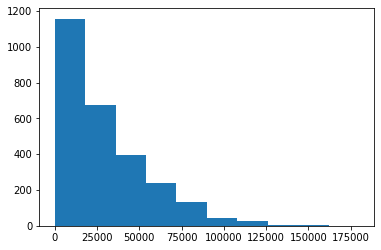

In [126]:
import matplotlib.pyplot as plt
x = BPD_19['OVERTIME'].loc[BPD_19['OVERTIME']>0]
plt.hist(x)